# GSASII: Reflections

In [30]:
import G2script as G2
import matplotlib.pyplot as plt
import numpy as np

In [13]:
PROJECT_NAME = 'gsas_reflection.gpx'
gpx = G2.G2Project(newgpx=PROJECT_NAME)
gpx.save()

gpx file saved as /home/edgar1993a/work/pyobjcryst/gsas_reflection.gpx


#### Add a phase into the project and simulate Powder Diffraction Data

In [14]:
zno = gpx.add_phase(phasename='zno', phasefile='ZnO.cif')
hist_zno = gpx.add_simulated_powder_histogram(histname='hist_zno', iparams='cuka.instprm', phases=[zno], Tmin=0, Tmax=100)
gpx.do_refinements()

/home/edgar1993a/work/pyobjcryst/ZnO.cif read by Reader CIF
gpx file saved as /home/edgar1993a/work/pyobjcryst/gsas_reflection.gpx
Simulating 2500 points from 0 to 100 degrees 2theta
Instrument parameters read: /home/edgar1993a/work/pyobjcryst/cuka.instprm (G2 fmt) bank 1
gpx file saved as /home/edgar1993a/work/pyobjcryst/gsas_reflection.gpx
 Hessian Levenberg-Marquardt SVD refinement on 1 variables:
initial chi^2 12341 with 2500 obs.
Read from file:/home/edgar1993a/work/pyobjcryst/gsas_reflection.bak0.gpx
Save to file  :/home/edgar1993a/work/pyobjcryst/gsas_reflection.gpx
GPX file save successful
 Refinement results are in file: /home/edgar1993a/work/pyobjcryst/gsas_reflection.lst
 ***** Refinement successful *****


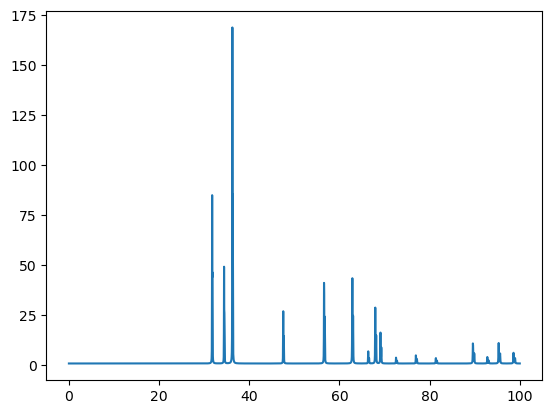

In [47]:
theta_data = hist_zno.getdata('X')
intensity_calculated = hist_zno.getdata('Ycalc')
plt.plot(theta_data, intensity_calculated)
plt.show()

#### We can retrieve an array with the information to generate the reflections

In [20]:
reflections = hist_zno.reflections()['zno']['RefList']

In [21]:
reflections.shape

(16, 15)

#### Each reflection is described by 15 parameters

In [63]:
reflection_0 = reflections[0,:]

In [64]:
index = (int(reflection_0[0]), int(reflection_0[1]), int(reflection_0[2]))
theta = reflection_0[5]
gaussian_width = reflection_0[6]
lorentz_width = reflection_0[7]

In [65]:
reflection_0[3]

6.0

In [66]:
from GSASIIpwd import getPsVoigt

In [68]:
theta_data = np.linspace(20,40,1000)
data_ref_0 = getPsVoigt(
    pos=theta,
    sig=gaussian_width,
    gam=lorentz_width,
    xdata=theta_data,
)[0]

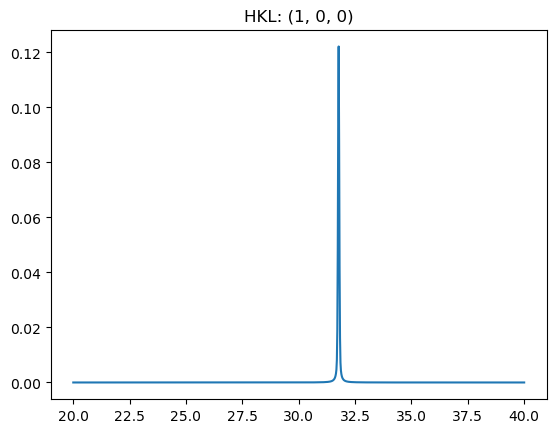

In [69]:
plt.plot(theta_data, data_ref_0)
plt.title(f'HKL: {index}')
plt.show()